## Exploring the Effect of Feature Selection on Heart Disease Classifier Performance

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Citation: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction. 

In [3]:
# importing packages

import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

resultsPath = os.path.join(os.getcwd(), 'Results')
dataPath = os.path.join(os.getcwd(), 'Data')

### Importing the Dataset

Attribute Information

* Age: age of the patient [years] <br>
* Sex: sex of the patient [M: Male, F: Female] <br>
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br>
* RestingBP: resting blood pressure [mm Hg] <br>
* Cholesterol: serum cholesterol [mg/dl] <br>
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br>
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br>
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] <br>
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No] <br>
* Oldpeak: oldpeak = ST [Numeric value measured in depression] <br>
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] <br>
* HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
df = pd.read_csv(os.path.join(dataPath, 'heart.csv'))
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### Dataset Exploratory Analysis

In [5]:
df.info()
#There are no empty values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


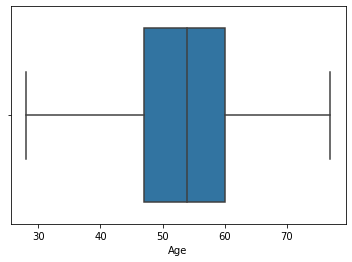

Type error
Type error


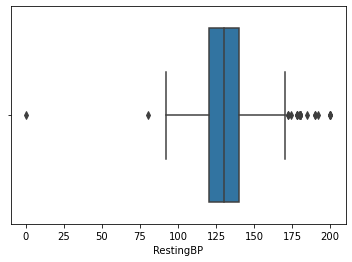

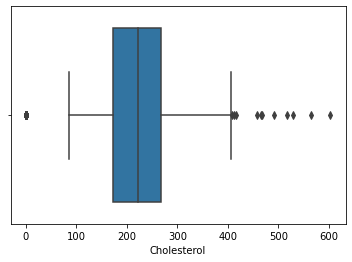

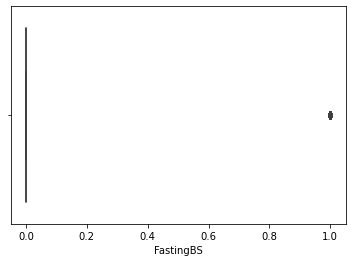

Type error


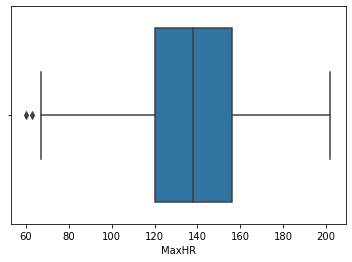

Type error


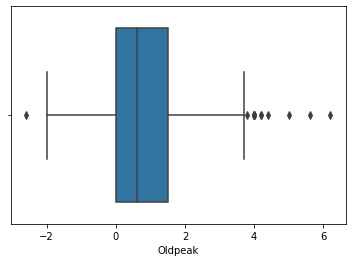

Type error


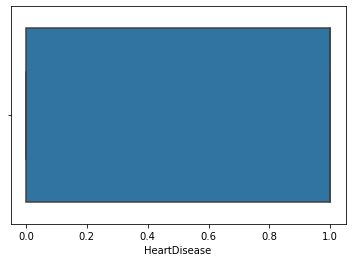

In [7]:
#Plotting box plots for each variable

for variable in df.columns:
    try:
        sns.boxplot(x=df[variable])
        plt.show()
    except TypeError:
        print('Type error')

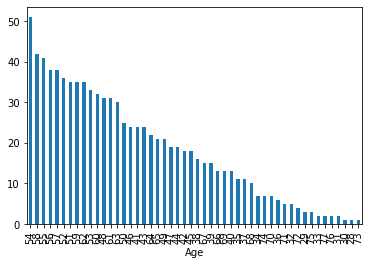

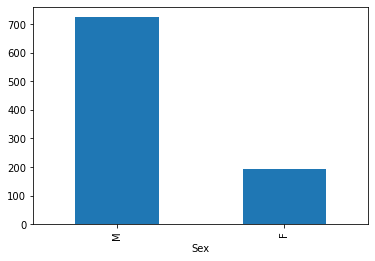

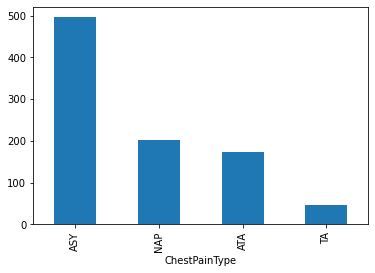

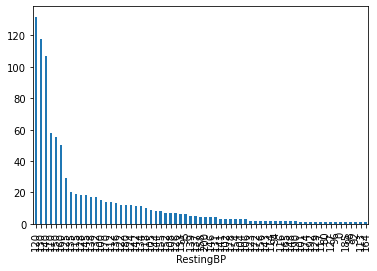

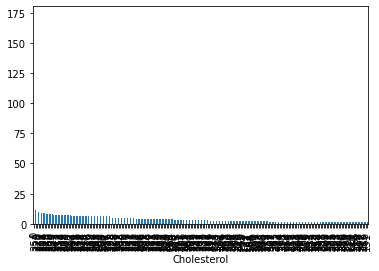

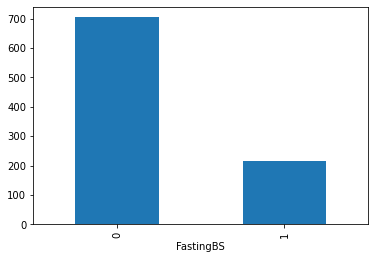

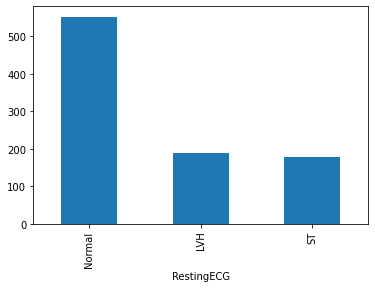

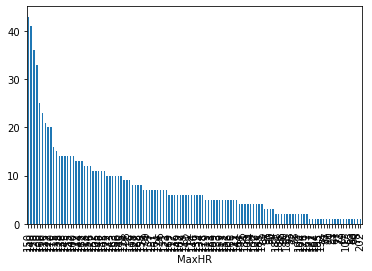

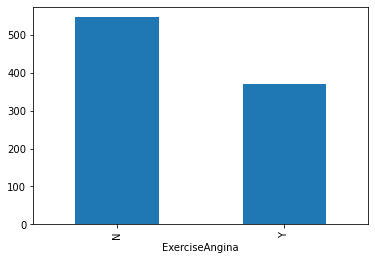

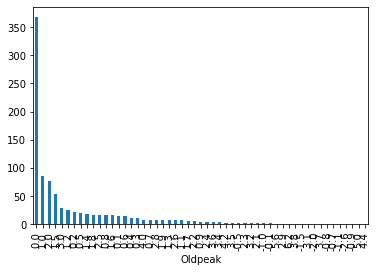

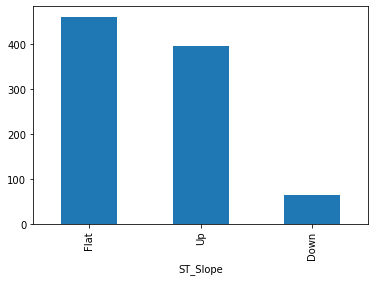

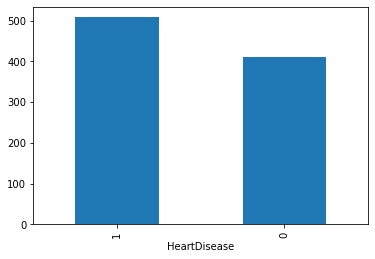

In [8]:
#plotting bar plots for each variable

for variable in df.columns:
    try:
        df[variable].value_counts().plot(kind='bar',xlabel = variable)
        plt.show()
    except TypeError:
        print('Type error')

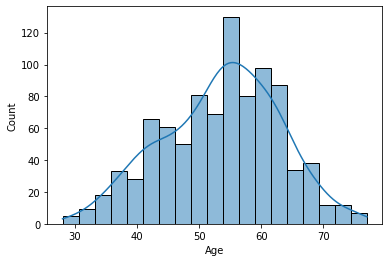

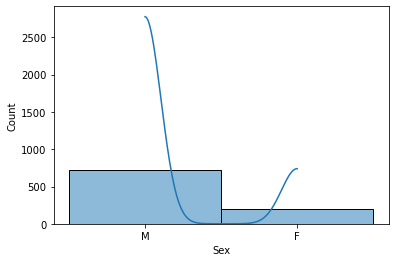

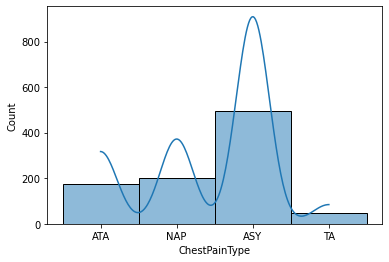

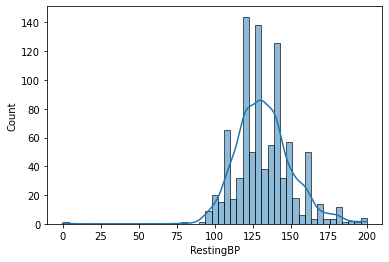

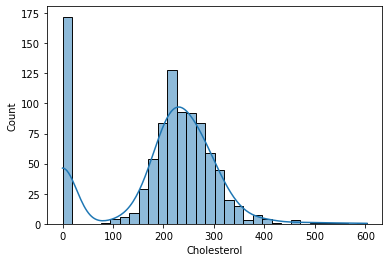

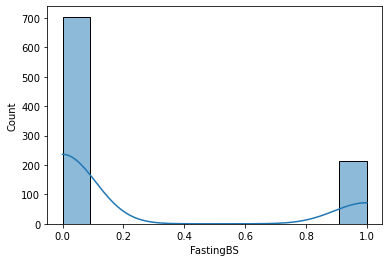

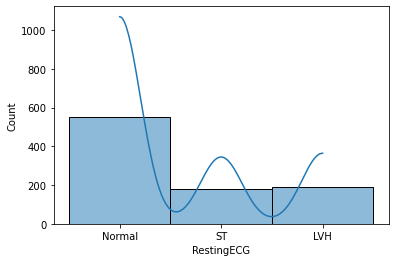

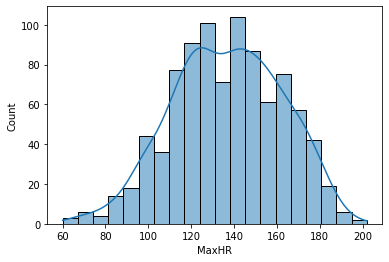

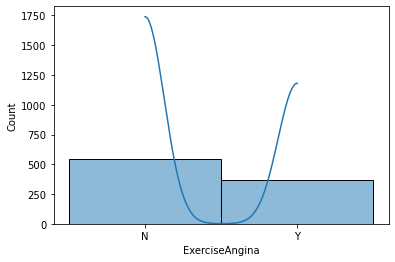

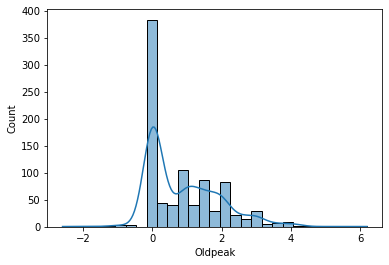

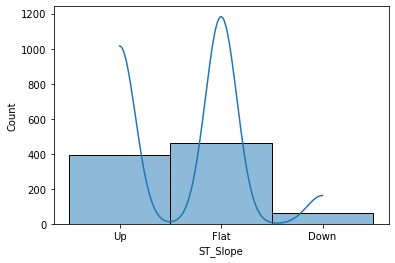

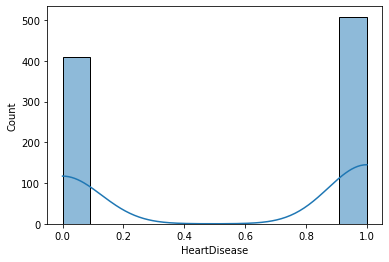

In [9]:
#plotting histograms for each variable to view distribution

for variable in df.columns:
    try:
        sns.histplot(data=df, x=variable, kde=True)
        plt.show()
    except TypeError:
        print('Type error')

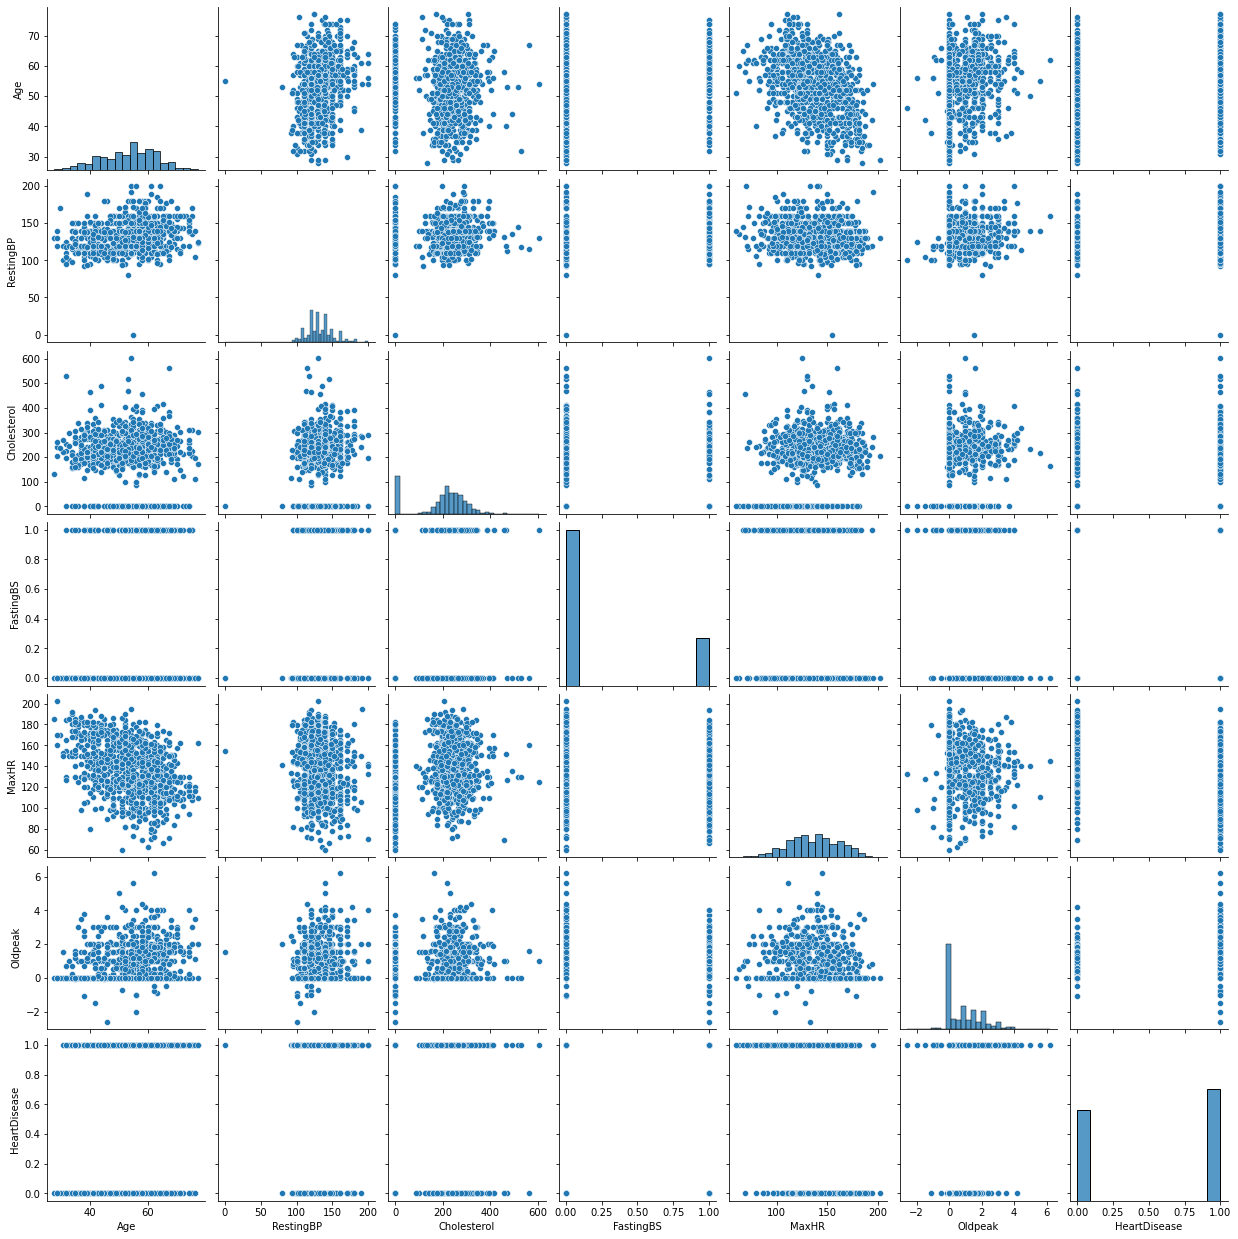

In [10]:
#pairplot to investigate correlated features
sns.pairplot(df)

<AxesSubplot:>

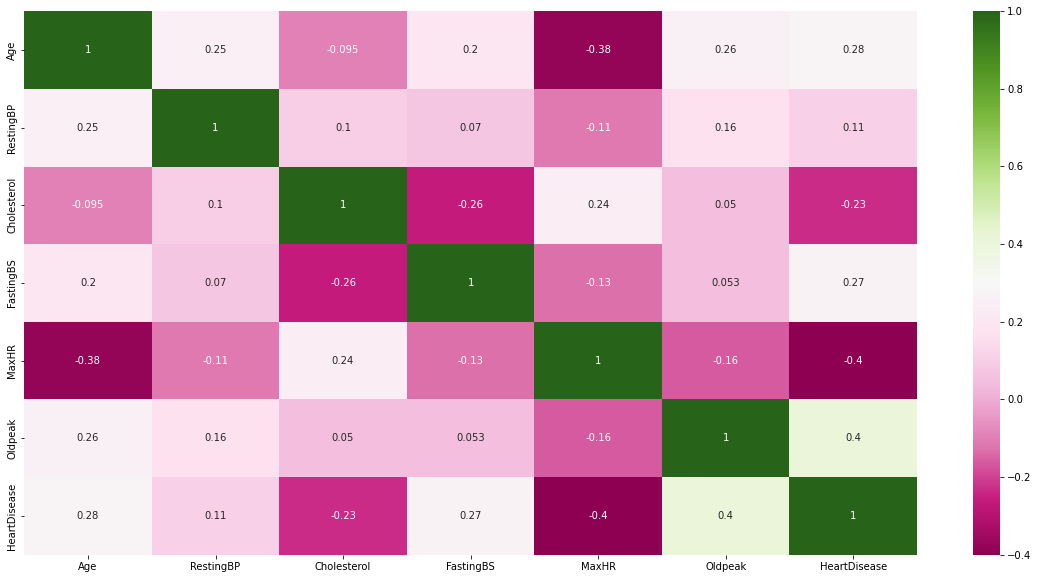

In [11]:
# correlation matrix
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap = "PiYG",annot=True)

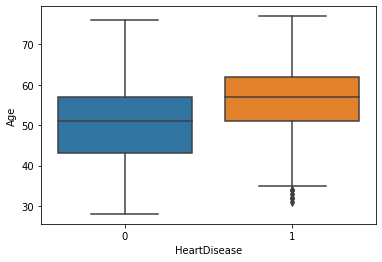

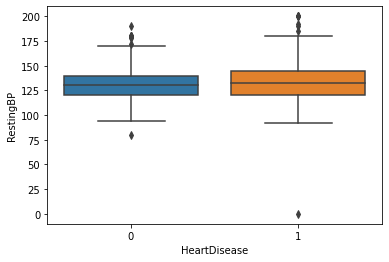

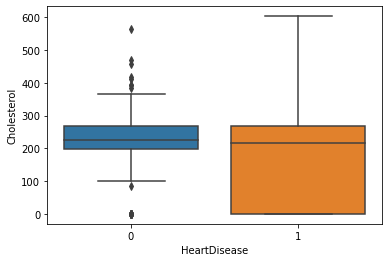

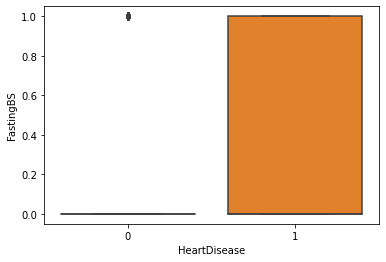

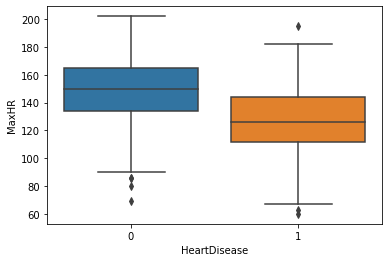

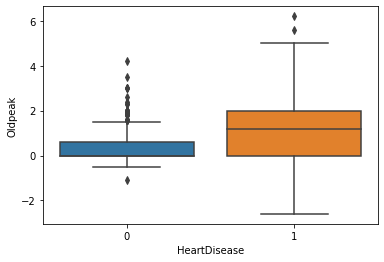

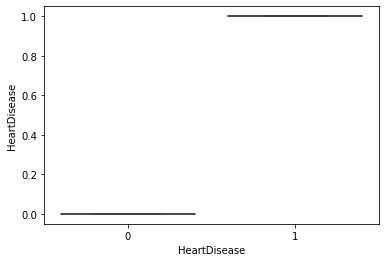

In [12]:
# plot each against the target - box plot vs target and confusion matrix for categorical

#Plotting box plots for each variable vs the target variable

for variable in df.columns:
    if df[variable].dtype in ('int64', 'float64'):
        sns.boxplot(x="HeartDisease", y=variable, data=df)
        plt.show()


        #apparent relationship between age and heart disease
        #apparent relationship between maxHR and heart disease
        

### Notes

* minimum val of zero for blood pressure - this is not a value that makes sense. Should these be treated as empty?
* minimum val of zero for cholesterol - this is not a value that makes sense. Should these be treated as empty?
* correlation between heart rate and age, hints that feature selection could help
* target class is relatively balanced, so accuracy could be a suitable metric



### Investigating Improvement of Lasso Regularization on Logistic Regression Performance

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [27]:
## see effect of replacing 0 values in blood pressure and cholesterol columns with the mean (excl. zero vals)
## marginally improves cv accuracy from 0.835 to 0.844

df['RestingBP_clean'] = df['RestingBP'].replace(0, np.NaN)
BP_mean = df['RestingBP_clean'].mean()
df['RestingBP_clean'] = df['RestingBP_clean'].replace(np.NaN, BP_mean)

df['Cholesterol_clean'] = df['Cholesterol'].replace(0, np.NaN)
BP_mean = df['Cholesterol_clean'].mean()
df['Cholesterol_clean'] = df['Cholesterol_clean'].replace(np.NaN, BP_mean)

In [44]:
#getting dummies and prepping df for model training

cols_numeric = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
cols_categorical = ['Sex','ChestPainType', 'ExerciseAngina', 'ST_Slope']
#cols_categorical = ['Sex','ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG']

X = df.drop(columns = ['HeartDisease', 'RestingBP', 'Cholesterol', 'RestingECG'])
#X = df.drop(columns = ['HeartDisease', 'RestingBP', 'Cholesterol'])

y = df[['HeartDisease']].iloc[:,0]

X_processed = pd.get_dummies(X, columns = cols_categorical, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

X_processed

,Age,FastingBS,MaxHR,Oldpeak,RestingBP_clean,Cholesterol_clean,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,0,172,0.0,140.0,289.0,1,1,0,0,0,0,1
1,49,0,156,1.0,160.0,180.0,0,0,1,0,0,1,0
2,37,0,98,0.0,130.0,283.0,1,1,0,0,0,0,1
3,48,0,108,1.5,138.0,214.0,0,0,0,0,1,1,0
4,54,0,122,0.0,150.0,195.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,132,1.2,110.0,264.0,1,0,0,1,0,1,0
914,68,1,141,3.4,144.0,193.0,1,0,0,0,0,1,0
915,57,0,115,1.2,130.0,131.0,1,0,0,0,1,1,0
916,57,0,174,0.0,130.0,236.0,0,1,0,0,0,1,0


In [45]:
### apply sklearn out-of-box regression

logModel_baseline = LogisticRegression(max_iter=10000)
logModel_baseline.fit(X_train, y_train)
y_pred_baseline = logModel_baseline.predict(X_test)

# performance summary
print(classification_report(y_test, y_pred_baseline))

## cross-validated metrics

# accuracy cv
print('5-fold cross-validated accuracy:',cross_val_score(logModel_baseline, X_processed, y, cv=5, scoring='accuracy').mean())

# precision cv
print('5-fold cross-validated precision:',cross_val_score(logModel_baseline, X_processed, y, cv=5, scoring='precision').mean())

# recall cv
print('5-fold cross-validated recall:',cross_val_score(logModel_baseline, X_processed, y, cv=5, scoring='recall').mean())

# f1-score cv
print('5-fold cross-validated f1-score:',cross_val_score(logModel_baseline, X_processed, y, cv=5, scoring='f1_weighted').mean())

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

5-fold cross-validated accuracy: 0.8452304585412213
5-fold cross-validated precision: 0.855308627299474
5-fold cross-validated recall: 0.8718889536012424
5-fold cross-validated f1-score: 0.8443517743984181


In [43]:
### set regularization penalty to lasso (l1) and use grid search to find ideal value of alpha

logModel_lasso = LogisticRegression(max_iter = 10000, penalty = 'l1', solver = 'liblinear')

GSV = GridSearchCV(logModel_lasso, param_grid= {"C":[0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7,1,2,3,4,5]}, cv=4, scoring = 'accuracy')
GSV.fit(X_train, y_train)
alpha = 1/GSV.best_estimator_.C
print(GSV.best_estimator_)

logModel_lasso = LogisticRegression(max_iter = 10000, penalty = 'l1', solver = 'liblinear', C = 0.6)
logModel_lasso.fit(X_train, y_train)
y_pred_lasso = logModel_lasso.predict(X_test)

# performance summary
print(classification_report(y_test, y_pred_lasso))

## cross-validated metrics

# accuracy cv
print('5-fold cross-validated accuracy:',cross_val_score(logModel_lasso, X_processed, y, cv=5, scoring='accuracy').mean())

# precision cv
print('5-fold cross-validated precision:',cross_val_score(logModel_lasso, X_processed, y, cv=5, scoring='precision').mean())

# recall cv
print('5-fold cross-validated recall:',cross_val_score(logModel_lasso, X_processed, y, cv=5, scoring='recall').mean())

# f1-score cv
print('5-fold cross-validated f1-score:',cross_val_score(logModel_lasso, X_processed, y, cv=5, scoring='f1_weighted').mean())

LogisticRegression(C=0.6, max_iter=10000, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276

5-fold cross-validated accuracy: 0.8441613209788548
5-fold cross-validated precision: 0.8579536292478454
5-fold cross-validated recall: 0.8679673849737914
5-fold cross-validated f1-score: 0.8430800415959311


In [18]:
import statsmodels.api as sm

X_processed_cnst = sm.add_constant(X_processed)
logmodel = sm.Logit(y, X_processed_cnst).fit_regularized(method = 'l1', alpha = 2)
logmodel.summary()

##the features RestingECG and Cholesterol were set to zero by the model


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3548648578606118
            Iterations: 86
            Function evaluations: 98
            Gradient evaluations: 86


/Users/chloewhite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/chloewhite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/chloewhite/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      906
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                  0.4942
Time:                        22:06:00   Log-Likelihood:                -319.20
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                1.164e-126
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                      0        nan        nan        nan         nan         nan
Age                   0.0098      0.010      0.975      0.330      -0.010       0.030
FastingBS             1.1583      0.238      4.862      0.000       0.691       1.625
MaxHR                -0.0129      0.003     -3.743      0.000      -0.020      -0.006
Oldpeak               0.3550      0.105      3.394      0.001       0.150       0.560
RestingBP_clean      -0.0016      0.005     -0.314      0.754      -0.012       0.008
Cholesterol_clean          0        nan        nan        nan         nan         nan
Sex_M                 1.3483      0.253      5.327      0.000       0.852       1.844
ChestPainType_ATA    -1.6371      0.330     -4.963      0.000      -2.284      -0.991
ChestPainType_NAP    -1.3560      0.245     -5.539      0.000      -1.836      -0.876
ChestPainType_TA     -0.9336      0.405     -2.307      0.021      -1.727      -0.141
ExerciseAngina_Y      0.8027      0.219      3.663      0.000       0.373       1.232
ST_Slope_Flat         0.9753      0.370      2.638      0.008       0.251       1.700
ST_Slope_Up          -1.1751      0.401     -2.929      0.003      -1.961      -0.389
RestingECG_Normal          0        nan        nan        nan         nan         nan
RestingECG_ST              0        nan        nan        nan         nan         nan
=====================================================================================
"""

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
#getting dummies and prepping df for model training

cols_numeric = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
cols_categorical = ['Sex','ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG']

X = df.drop(columns = ['HeartDisease', 'RestingBP', 'Cholesterol'])
y = df[['HeartDisease']].iloc[:,0]

X_processed = pd.get_dummies(X, columns = cols_categorical, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

X_processed

,Age,FastingBS,MaxHR,Oldpeak,RestingBP_clean,Cholesterol_clean,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,0,172,0.0,140.0,289.0,1,1,0,0,0,0,1,1,0
1,49,0,156,1.0,160.0,180.0,0,0,1,0,0,1,0,1,0
2,37,0,98,0.0,130.0,283.0,1,1,0,0,0,0,1,0,1
3,48,0,108,1.5,138.0,214.0,0,0,0,0,1,1,0,1,0
4,54,0,122,0.0,150.0,195.0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,132,1.2,110.0,264.0,1,0,0,1,0,1,0,1,0
914,68,1,141,3.4,144.0,193.0,1,0,0,0,0,1,0,1,0
915,57,0,115,1.2,130.0,131.0,1,0,0,0,1,1,0,1,0
916,57,0,174,0.0,130.0,236.0,0,1,0,0,0,1,0,0,0


In [47]:
##### raw random forest

base_rf = RandomForestClassifier()

base_rf.fit(X_train, y_train)

y_pred_rf = base_rf.predict(X_test)

# performance summary
print(classification_report(y_test, y_pred_rf))

# accuracy cv
print('5-fold cross-validated accuracy:',cross_val_score(base_rf, X_processed, y, cv=5, scoring='accuracy').mean())

# precision cv
print('5-fold cross-validated precision:',cross_val_score(base_rf, X_processed, y, cv=5, scoring='precision').mean())

# recall cv
print('5-fold cross-validated recall:',cross_val_score(base_rf, X_processed, y, cv=5, scoring='recall').mean())

# f1-score cv
print('5-fold cross-validated f1-score:',cross_val_score(base_rf, X_processed, y, cv=5, scoring='f1_weighted').mean())

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       112
           1       0.89      0.88      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

5-fold cross-validated accuracy: 0.82559990496555
5-fold cross-validated precision: 0.8435643906954212
5-fold cross-validated recall: 0.856105610561056
5-fold cross-validated f1-score: 0.8289926794977047


In [48]:
#### tuned random forest

n_estimators = [10,30,50,70,90]
max_depth = [2,4,6, 7, 8, 9]
min_samples_split = [2, 5, 10, 20, 30, 40]
min_samples_leaf = [1, 2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt']
max_terminal_nodes = [2, 3, 4, 5]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': [True, False]}

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, scoring='accuracy')

rf_Grid.fit(X_train, y_train)

rf_Grid.best_params_

{'n_estimators': [10, 30, 50, 70, 90], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 7, 8, 9], 'min_samples_split': [2, 5, 10, 20, 30, 40], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'bootstrap': [True, False]}


{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [49]:
rf_Model_tuned = RandomForestClassifier(bootstrap = True,
 max_depth = 9,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 90)

rf_Model_tuned.fit(X_train, y_train)

y_pred_rf = rf_Model_tuned.predict(X_test)

# performance summary
print(classification_report(y_test, y_pred_rf))

# accuracy cv
print('5-fold cross-validated accuracy:',cross_val_score(rf_Model_tuned, X_processed, y, cv=5, scoring='accuracy').mean())

# precision cv
print('5-fold cross-validated precision:',cross_val_score(rf_Model_tuned, X_processed, y, cv=5, scoring='precision').mean())

# recall cv
print('5-fold cross-validated recall:',cross_val_score(rf_Model_tuned, X_processed, y, cv=5, scoring='recall').mean())

# f1-score cv
print('5-fold cross-validated f1-score:',cross_val_score(rf_Model_tuned, X_processed, y, cv=5, scoring='f1_weighted').mean())

## Getting feature importances


feature_names = X_train.columns
importances = rf_Model_tuned.feature_importances_

forest_importances = pd.Series(importances, index=feature_names).sort_values(0)
forest_importances

## least important features were ChestPainType_TA, RestingECG_ST, RestingECG_Normal, ChestPainType_NAP, FastingBS


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       112
           1       0.90      0.88      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

5-fold cross-validated accuracy: 0.8343133760988358
5-fold cross-validated precision: 0.849609634551495
5-fold cross-validated recall: 0.866006600660066
5-fold cross-validated f1-score: 0.8323782595858153


/var/folders/vr/d1mwczgs7sd8h3d5yhgm7m400000gn/T/ipykernel_16272/923831822.py:33: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  forest_importances = pd.Series(importances, index=feature_names).sort_values(0)


ChestPainType_TA     0.006532
RestingECG_ST        0.008888
RestingECG_Normal    0.011675
ChestPainType_NAP    0.021063
FastingBS            0.021179
ChestPainType_ATA    0.027717
Sex_M                0.037856
Cholesterol_clean    0.053560
RestingBP_clean      0.064498
Age                  0.077577
MaxHR                0.086233
ExerciseAngina_Y     0.108184
Oldpeak              0.136160
ST_Slope_Flat        0.152178
ST_Slope_Up          0.186700
dtype: float64

In [59]:
######### dropping least important features

X_train = X_train.drop(columns = ['ChestPainType_TA', 'RestingECG_ST', 'RestingECG_Normal'])
X_test = X_test.drop(columns = ['ChestPainType_TA', 'RestingECG_ST', 'RestingECG_Normal'])

n_estimators = [10,30,50,70,90]
max_depth = [2,4,6, 7, 8, 9]
min_samples_split = [2, 5, 10, 20, 30, 40]
min_samples_leaf = [1, 2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt']
max_terminal_nodes = [2, 3, 4, 5]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': [True, False]}

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, scoring='accuracy')

rf_Grid.fit(X_train, y_train)

rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 50}

In [60]:
rf_Model_dropped = RandomForestClassifier(bootstrap = False,
 max_depth = 7,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 20,
 n_estimators = 50)

rf_Model_dropped.fit(X_train, y_train)

y_pred_rf = rf_Model_dropped.predict(X_test)

# performance summary
print(classification_report(y_test, y_pred_rf))

# accuracy cv
print('5-fold cross-validated accuracy:',cross_val_score(rf_Model_dropped, X_processed, y, cv=5, scoring='accuracy').mean())

# precision cv
print('5-fold cross-validated precision:',cross_val_score(rf_Model_dropped, X_processed, y, cv=5, scoring='precision').mean())

# recall cv
print('5-fold cross-validated recall:',cross_val_score(rf_Model_dropped, X_processed, y, cv=5, scoring='recall').mean())

# f1-score cv
print('5-fold cross-validated f1-score:',cross_val_score(rf_Model_dropped, X_processed, y, cv=5, scoring='f1_weighted').mean())

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       112
           1       0.89      0.85      0.87       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.85      0.85       276

5-fold cross-validated accuracy: 0.8397481587075315
5-fold cross-validated precision: 0.841502058187616
5-fold cross-validated recall: 0.8777713065424189
5-fold cross-validated f1-score: 0.8331638552470324


[False False False False False False False False False False False False
  True False False]
Index(['Age', 'FastingBS', 'MaxHR', 'Oldpeak', 'RestingBP_clean',
       'Cholesterol_clean', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'RestingECG_Normal', 'RestingECG_ST'],
      dtype='object')
5-fold cross-validated accuracy: 0.8343311950582086
5-fold cross-validated recall: 0.8738885653271209
[False False False  True False False False False False False False False
  True False False]
Index(['Age', 'FastingBS', 'MaxHR', 'Oldpeak', 'RestingBP_clean',
       'Cholesterol_clean', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'RestingECG_Normal', 'RestingECG_ST'],
      dtype='object')
5-fold cross-validated accuracy: 0.8321216440959848
5-fold cross-validated recall: 0.8620656183265385
[False  True False  True F

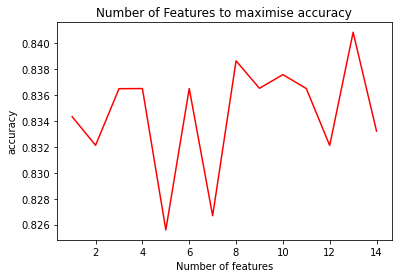

In [96]:
#### forward selection random forest

from sklearn.feature_selection import SequentialFeatureSelector

results = []
for i in range(len(X_train.columns)-1):
    rf_Model = RandomForestClassifier()

    sfs = SequentialFeatureSelector(rf_Model, n_features_to_select=i+1,  scoring='accuracy', cv=3)
    sfs.fit(X_train, y_train)

    print(sfs.get_support())
    print(X_train.columns)
    
    X_train_sfs = sfs.transform(X_train)
    
    rf_sfs = RandomForestClassifier()

    rf_sfs.fit(X_train, y_train)
    
    y_pred_rf = rf_sfs.predict(X_test)

    accuracy = cross_val_score(rf_sfs, X_processed, y, cv=5, scoring='accuracy').mean()
    # accuracy cv
    print('5-fold cross-validated accuracy:', accuracy)
    print('5-fold cross-validated recall:',cross_val_score(rf_Model_tuned, X_processed, y, cv=5, scoring='recall').mean())

    results.append([i+1, accuracy])

results = np.asarray(results)

plt.title("Number of Features to maximise accuracy")
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(results[:,0], results[:,1], color ="red")
plt.show()